# **Salifort Motors Employee Retention Project**

Data Source: https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv (License - CC0: Public Domain)

Run on Python 3.11.3 | No errors | No warnings

In [48]:
# -----------------------
# Step 0: Import packages
# ----------------------- 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
# Use pip install xgboost if calls to xgboost return module not found error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

# for displaying and modifying the working directory
import os as os

In [49]:
# -----------------------------------------------
# Step 1: Load dataset into dataframe and verify
# -----------------------------------------------

# Tell python where to find the dataset and load it to dataframe df0
os.chdir(r'D:\OneDrive\Documents\Advanced Capstone\CSV') # absolute path, using \ and r prefix
df0 = pd.read_csv("HR_comma_sep.csv")

# Display the first 10 rows of the dataframe
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

In [50]:
# ------------------------------------------------------------
# Step 2: Initial Exploratory Data Analysis (EDA) and Cleaning
# ------------------------------------------------------------

# Display basic information about the data 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [51]:
# Display descriptive statistics about the data 
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [52]:
# Display column names 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [53]:
# Rename columns that are misspelled, not easy to work with or that do not follow standard naming conventions
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display updated column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [54]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing (NA) values 

In [55]:
# Check for duplicates
df0.duplicated().sum()

3008

3,008 of 14,999 rows (20%) are duplicates.

In [56]:
# Inspect a few of the duplicated rows
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

These are valid duplicates. It's very unlikely that two employees reported the same information for every column.

In [57]:
# Remove duplicates and save results to dataframe to df1
df1 = df0.drop_duplicates(keep='first')

# Display first 10 rows of dataframe df1
df1.head(10)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low  
5       3              0     1                      0      sales     low  
6       4              0     1                      0      sales     low  
7       5              0     1                      0      sales     low  
8       5              0     1                      0      sales     low  
9       3              0     1                      0      sales     low

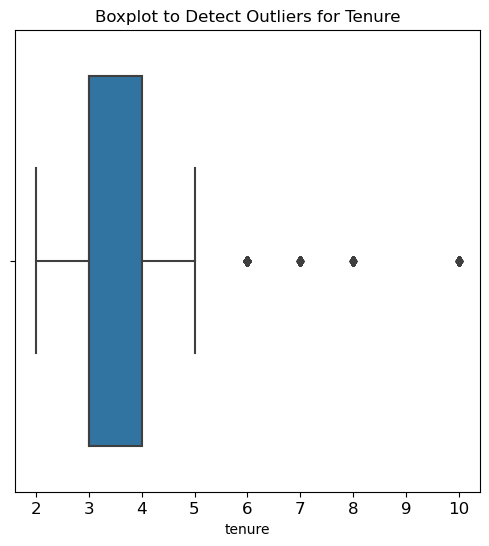

In [58]:
# Create a boxplot of the distribution of `tenure` to check for outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to Detect Outliers for Tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

There are a few outliers for tenure.

In [59]:
# Determine the number of rows containing outlier values for tenure

# Calculate the 25th percentile
percentile25 = df1['tenure'].quantile(0.25)

# Calculate the 75th percentile
percentile75 = df1['tenure'].quantile(0.75)

# Calculate the interquartile range
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outlier values for `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count the number of rows with outliers
print("Number of rows with outliers for `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows with outliers for `tenure`: 824


In [60]:
# --------------------------------
# Step 3: Further Data Exploration
# --------------------------------

# Display number of people who stayed (0) and left (1)
print(df1['left'].value_counts())
print()

# Display percentage of people who stayed (0) and left (1)
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


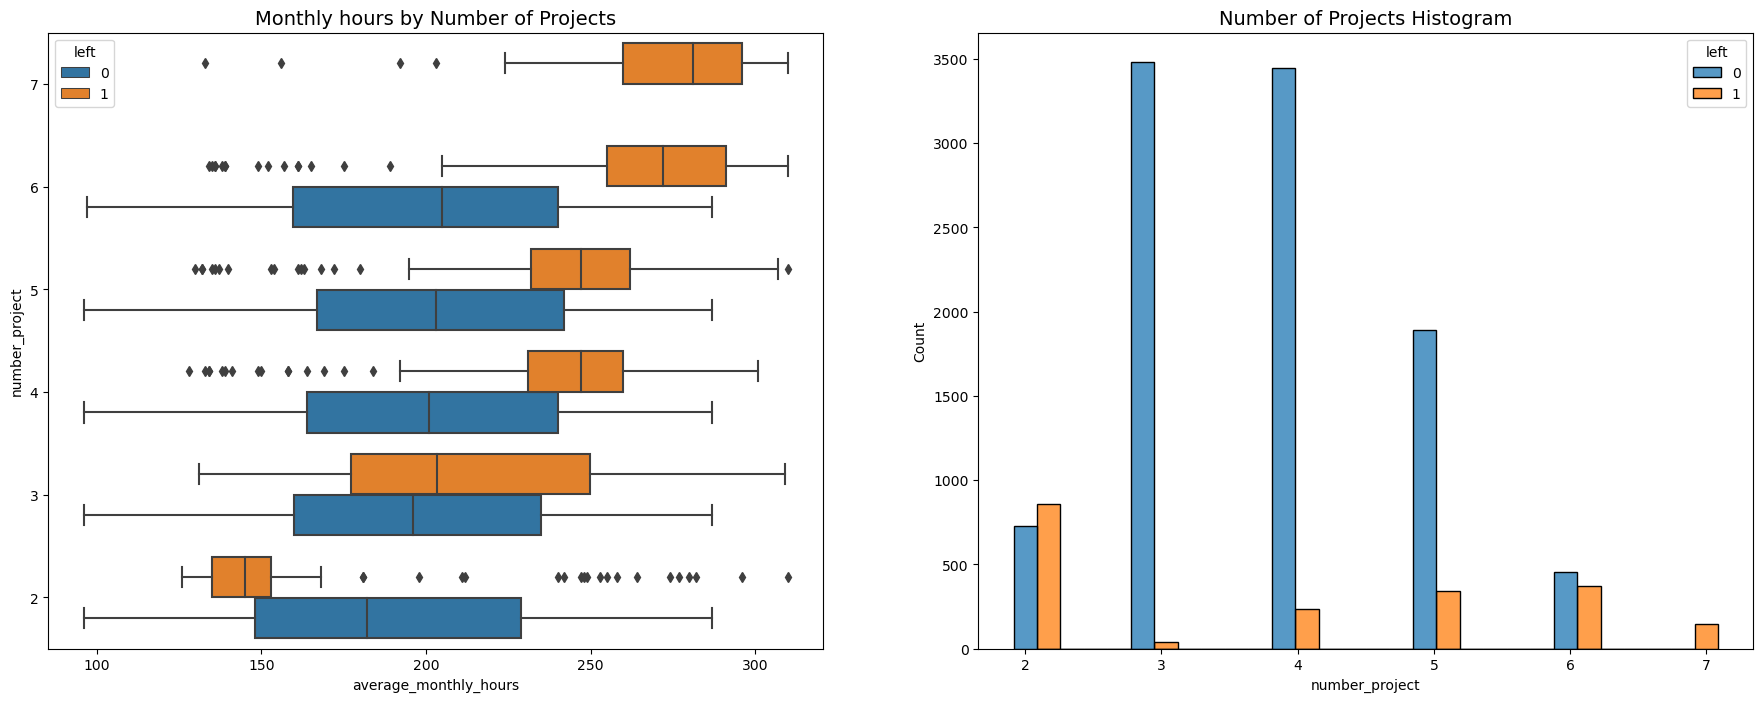

In [61]:
# Display plots to help illustrate

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by Number of Projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of Projects Histogram', fontsize='14')

# Display the plots
plt.show()

Employees who handled 3 to 4 projects, possibly 5 and worked close to their regular hours every month, stayed. Employees who handled fewer than 3 projects or more than 5, left. Also, employees who were frequently absent or putting in a great deal more hours every month, left. Some of the employees are overworked.

In [62]:
# Display number of people who worked 7 projects stayed (0) and left (1)
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

145 employees handled 7 projects. None stayed. 145 left.

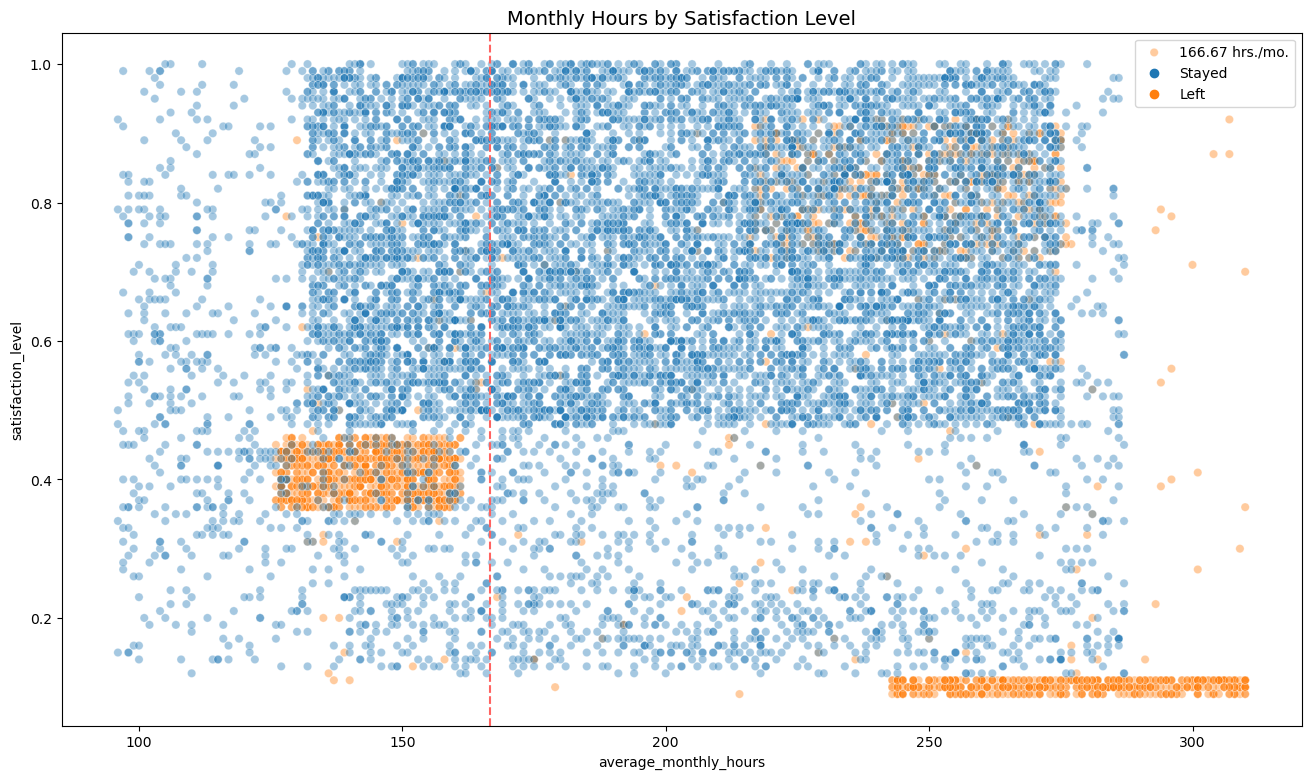

In [63]:
# Display a scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed vs employees who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'Stayed', 'Left'])
plt.title('Monthly Hours by Satisfaction Level', fontsize='14');

There's been some data manipulation which explains the unusual distribution, but we still have well-defined groupings for the employees who who worked fewer hours than average and a great deal more than average, had low satifaction scores and left.

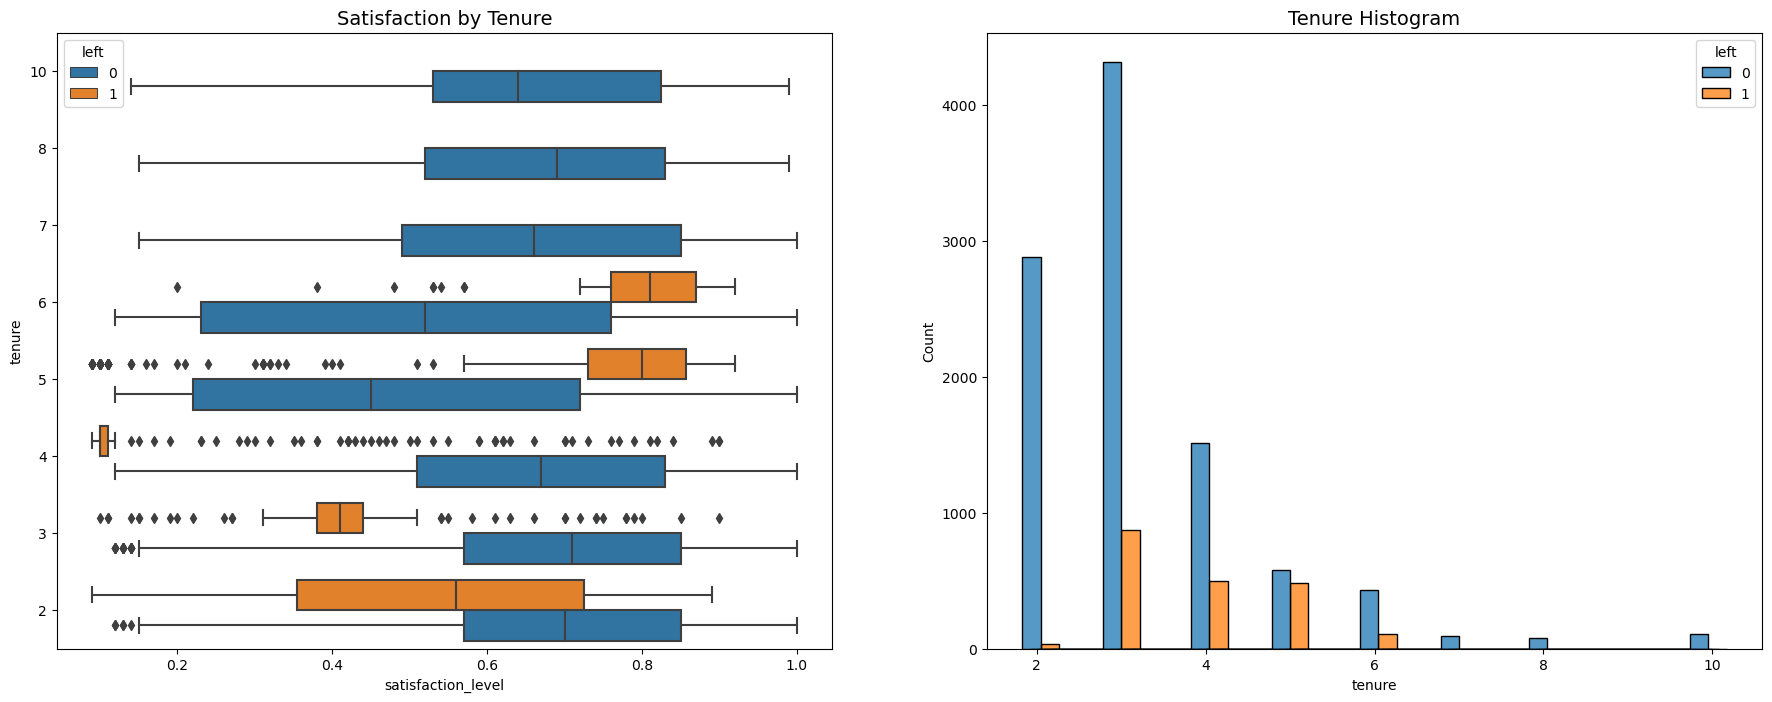

In [64]:
# More plots, this time looking at satisfaction level and tenure

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Display boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize='14')

# Display histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure Histogram', fontsize='14')

plt.show();

Employees with the company for 2 to 3 years and 7 to 10 years are more satisfied overall. Something's happening when employees reach the 4 year mark. Those with the longest tenure seem to be satisfied with the company and may be some of the higher paid people.

In [65]:
# Calculate mean and median satisfaction scores for employees who left and employees who stayed
# 0 = stayed, 1 = left
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

In both cases, the mean and median are close. Employees who stayed scored the company higher than those who left.

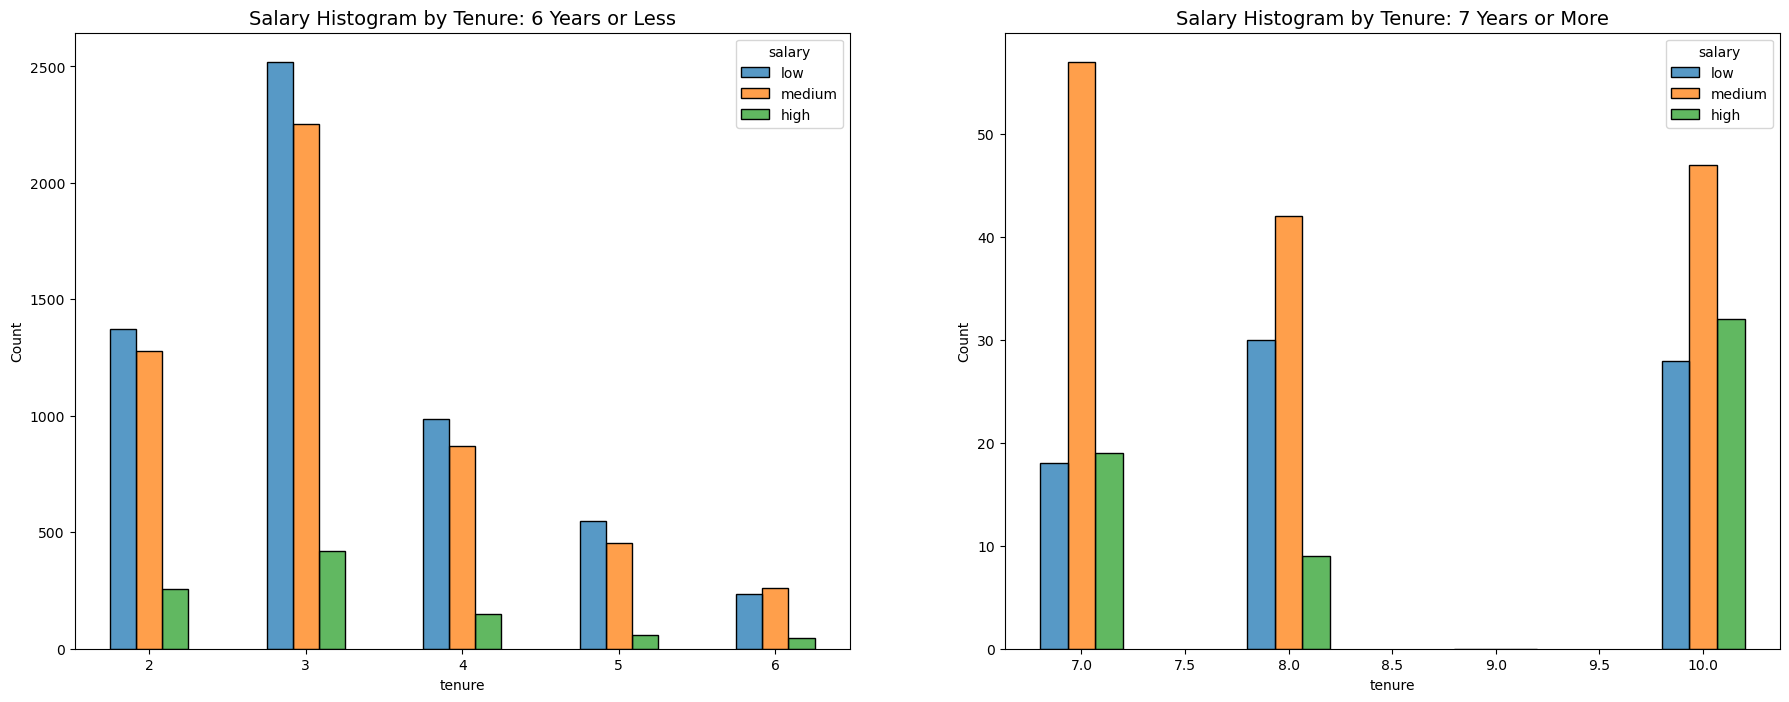

In [66]:
# Plots of tenure vs salary

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary Histogram by Tenure: 6 Years or Less', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary Histogram by Tenure: 7 Years or More', fontsize='14');

Both tenure groups are composed primarily of medium salary people.

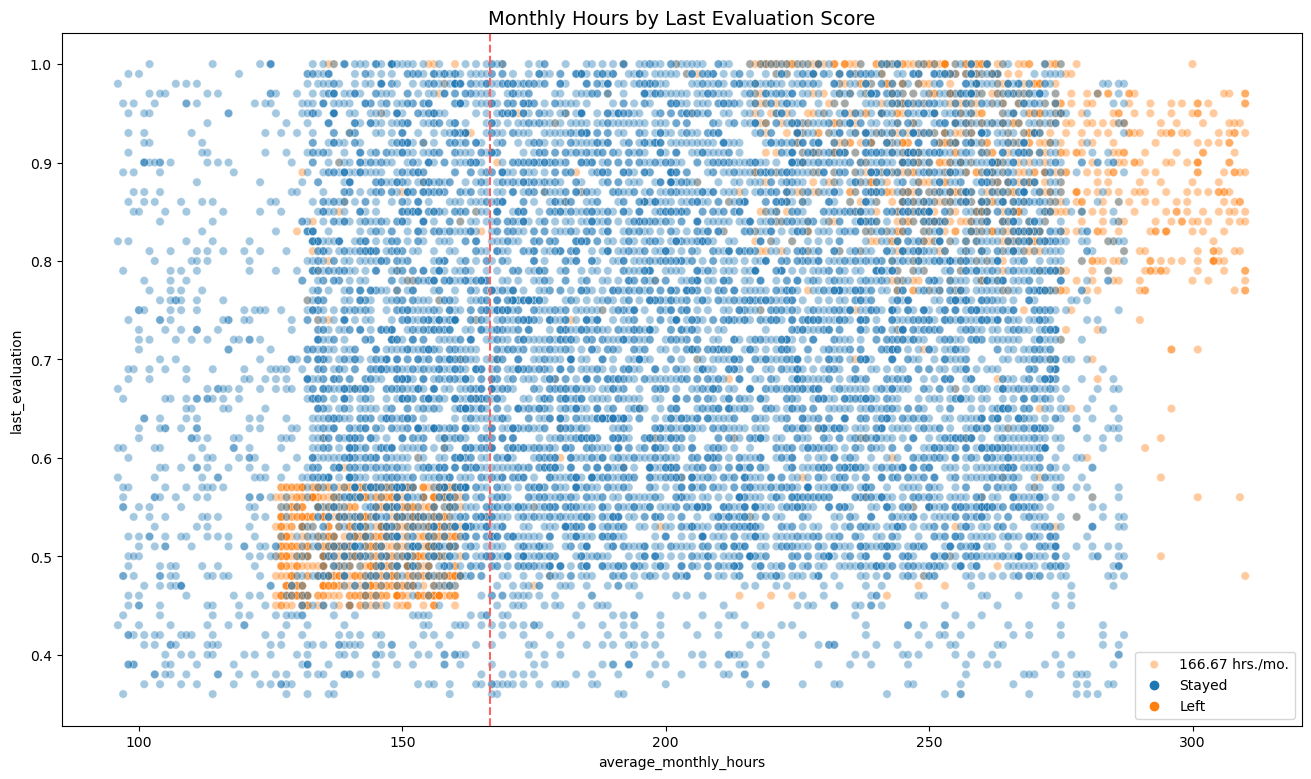

In [67]:
# Display a scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'Stayed', 'Left'])
plt.title('Monthly Hours by Last Evaluation Score', fontsize='14');

We're seeing two groups of employees. Those who put in a lot of hours and gave the company high scores. And those who put in fewer hours and gave the company lower scores. Hours worked and evaluation scores might correlate.

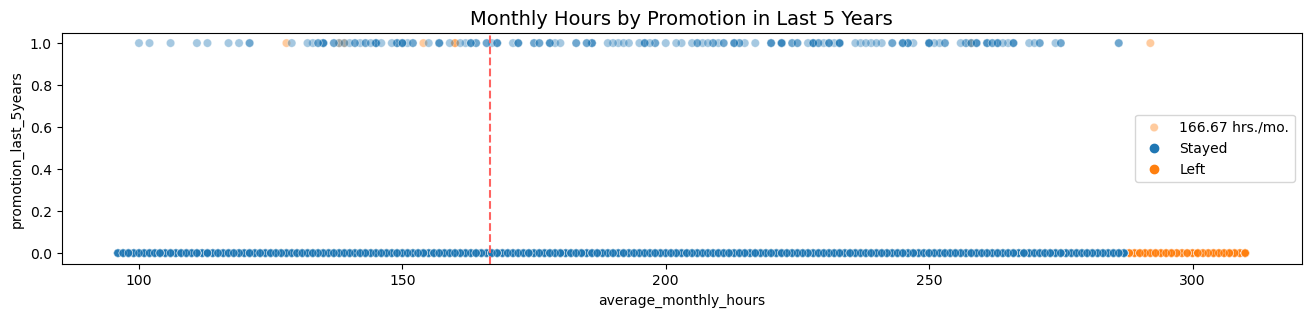

In [130]:
# Display plot of the relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'Stayed', 'Left'])
plt.title('Monthly Hours by Promotion in Last 5 Years', fontsize='14');

Employees promoted in the last 5 years tended to stay.
Not very many of the employees who worked the most hours were promoted.
All the employees who left put in the longest hours.

In [69]:
# Display counts of employees by department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

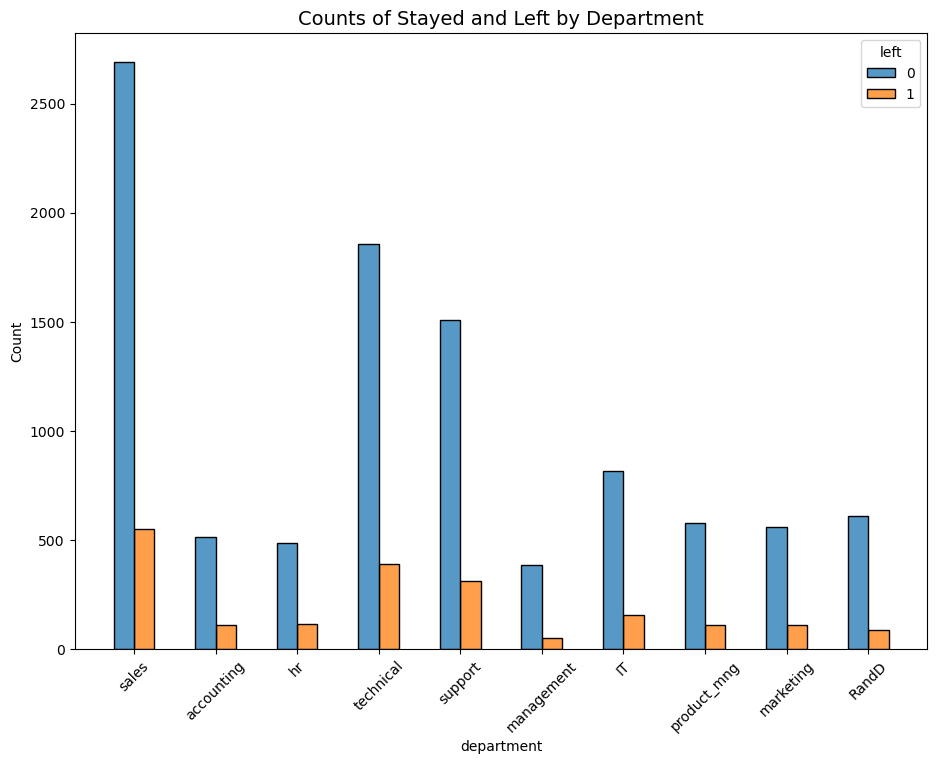

In [70]:
# Display a histogram to show the distribution of employees who left and those who didn't by department
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of Stayed and Left by Department', fontsize=14);

The proprtion of employees who stayed and those who left is fairly consistent across all departments.

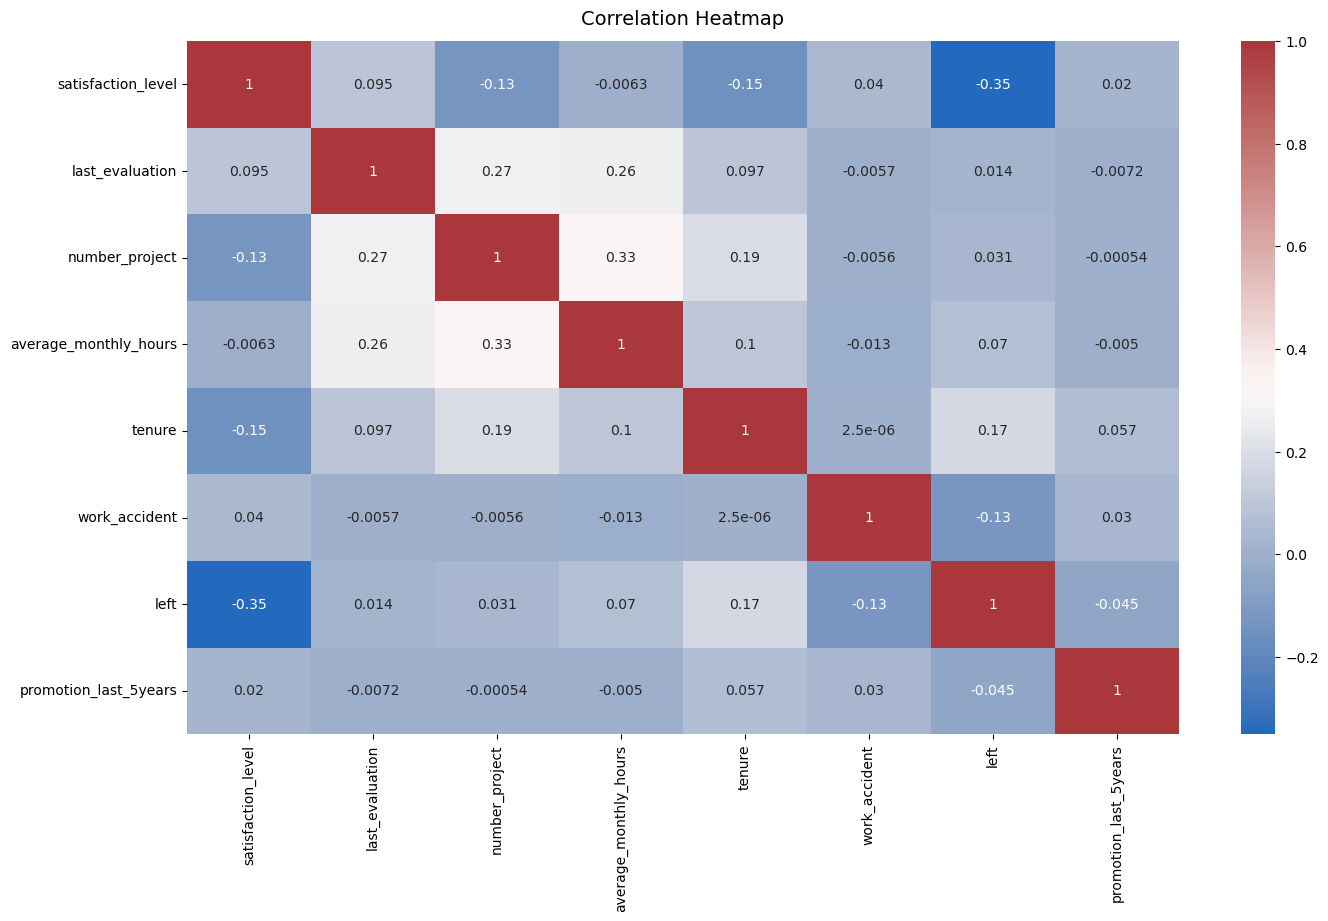

In [71]:
# Display a heatmap of the correlation
corr = df1.corr(numeric_only = 1)
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(corr, vmin=None, vmax=None, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Number of projects, monthly hours and evaluation scores have some positive correlation with each other.
Employees who left and satisfaction scores have a negative correlation.
There may be a problem with employees being mismanaged. The ones who leave are working long hours, not receiving promotions and giving the company very low satisfaction scores.

In [72]:
# --------------------------------------------------
# Step 4: Build and Test a Logistic Regression Model
# --------------------------------------------------

# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

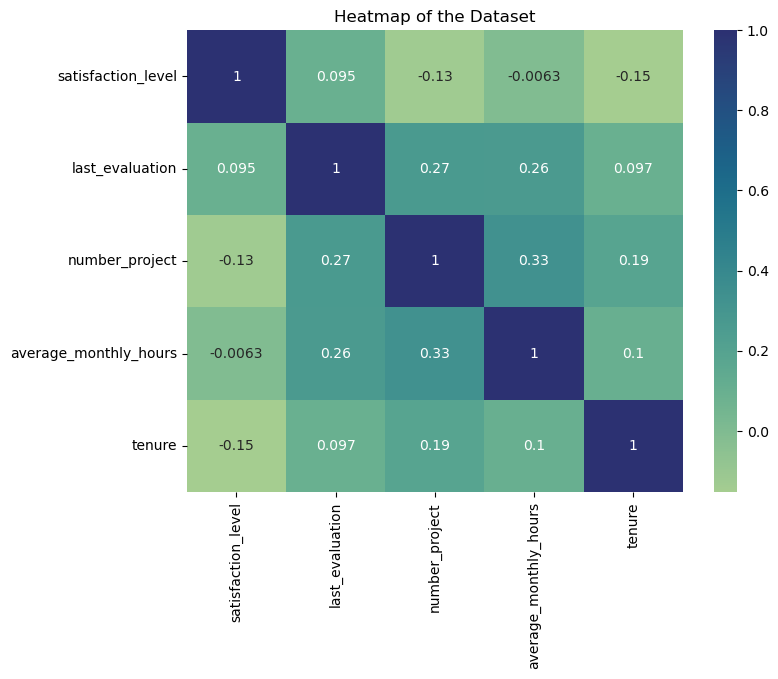

In [73]:
# Display a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the Dataset')
plt.show()

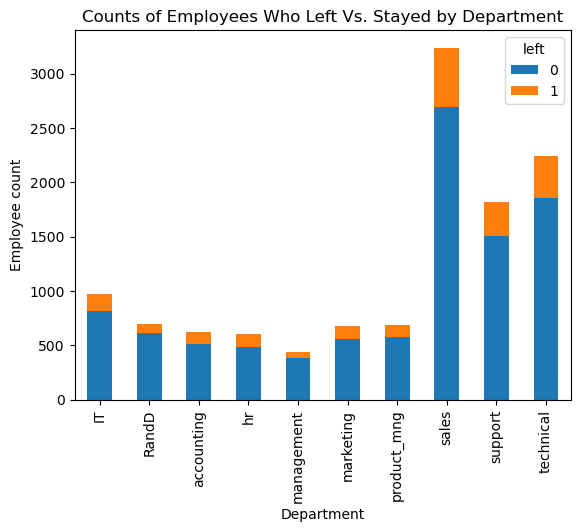

In [74]:
# Display a stacked bar chart of number of employees by department, comparing those who left with those who stayed
# 0 = stayed, 1 = left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',stacked=True)
plt.title('Counts of Employees Who Left Vs. Stayed by Department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [75]:
# Select the rows without outliers in `tenure` and save resulting dataframe in a new variable
# Logistic regression is sensitive to outliers, so best not to use them
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [76]:
# Specify the outcome (variable) to predict (y)
y = df_logreg['left']

# Display first few rows of y
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [77]:
# Select the features (X)
X = df_logreg.drop('left', axis=1)

# Display the first few rows of X 
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   
5       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [78]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [79]:
# Build logistic regression model and fit it to the training data
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [80]:
# Use the logistic regression model to get predictions from the test data
y_pred = log_clf.predict(X_test)

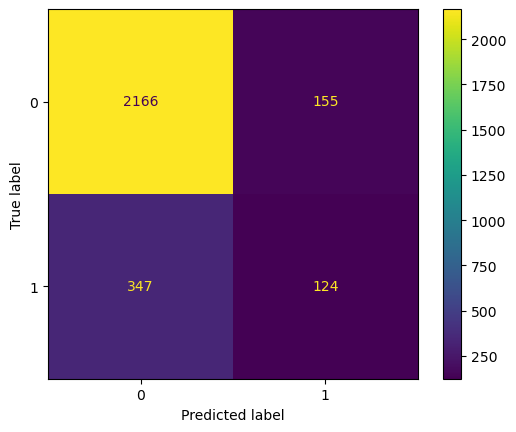

In [81]:
# Create a confusion matrix

# Calculate values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant is the number of true negatives (people who stayed).
The lower-right quadrant is the number of true positives (people who left).
The upper-right quadrant is the number of false positives (people predicted to leave who did not).
The lower-left quadrant is the number false negatives (people predicted to stay who did not).

In [82]:
# How are the predictions balanced?
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The split is roughly 83% to 17%, which is not perfect but not too bad overall. We'll continue evaluating the model without modification.

In [83]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The weighted averages for precision, recall and f1-score are fairly good, but they favor predicting employees who will stay. We really want to predict employees who will leave, so a different model may provide better results.

In [84]:
# ---------------------------------------------------------------------------
# Step 5: Build and Test a Tree-Based Model (Decision Tree and Random Forest)
# ---------------------------------------------------------------------------

# Select the outcome (variable) to predict (y)
y = df_enc['left']

# Display the first few rows of y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [85]:
# Select the features (X)
X = df_enc.drop('left', axis=1)

# Display the first few rows of X
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [86]:
# Split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [87]:
# Create decision tree - Round 1

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [88]:
# Fit the model to the training data

tree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'roc_auc', 'precision'})

In [89]:
# Identify the best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [90]:
# Identify the best area under the curve (AUC) score on CV
tree1.best_score_

0.969819392792457

This is a very strong score. The model should do a very good job of predicting employees who will leave.

In [91]:
# Create a function that will provide all the scores from the grid search

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the dataframe with the max score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [92]:
# Display the scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

These are really strong scores and indicators of very good model performace. However, decision trees come with a risk of overfitting to the test data. We should try one more model to make sure all is well.

In [93]:
# Construct a random forest model

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [94]:
# fit the model to the training data

rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'roc_auc', 'precision'})

In [95]:
# Specify where to save the model
path = 'D:\OneDrive\Documents\Advanced Capstone\Pickle\Pickle'

In [96]:
# Set up a function to save the model

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [97]:
# Set up a function to load the model

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [98]:
# Save the model (write pickle)
write_pickle(path, rf1, 'hr_rf1')

In [99]:
# Load the model (read pickle)
rf1 = read_pickle(path, 'hr_rf1')

In [100]:
# Display best area under the curve (AUC) score
rf1.best_score_

0.9804250949807172

In [101]:
# Display the best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [102]:
# Display all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The scores for the random forest model are better than the scores for the decision tree model, except for recall which virtually the same. The random forest model is the best model for this data.

In [103]:
# Define a function that will get the scores for the model's predictions

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [104]:
# Use the test data to make predictions

rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The test scores are very similar to the validation scores. This should be a reliable model. Its performance with this data should indicate how well it will perform with new data.

We should do some further evaluation to make sure that relying on average monthly hours won't lead us in the wrong direction.

In [105]:
# -----------------------------------------------------------------
# Step 6: Feature Engineering to Validate Random Forest Performance
# -----------------------------------------------------------------

# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first 10 rows of new dataframe
df2.head(10)

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   
5             0.50               2                    153       3   
6             0.77               6                    247       4   
7             0.85               5                    259       5   
8             1.00               5                    224       5   
9             0.53               2                    142       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   
5              0     1                      0       0              0   
6              0     1                      0       0              0   
7              0     1                      0       0              0   
8              0     1                      0       0              0   
9              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0  
6                 1                   0                     0  
7                 1                   0                     0  
8                 1                   0                     0  
9                 1                   0                     0

In [106]:
# Create `overworked` column. For the moment, it's the same as average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Display min and max values for overworked
print('Min hours:', df2['overworked'].min())
print('Max hours:', df2['overworked'].max())

Min hours: 96
Max hours: 310


In [107]:
# Define `overworked` as working more than 175 hrs per month (avg is about 166.67)
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [108]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

In [109]:
# Select the outcome (variable) to predict (y)
y = df2['left']

# Select the features (X)
X = df2.drop('left', axis=1)

In [110]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [111]:
# Creat decision tree - Round 2
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [112]:
# Fit the model to the training data
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'roc_auc', 'precision'})

In [113]:
# Display the best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [114]:
# Display the best AUC score on CV
tree2.best_score_

0.9586752505340426

The model is a strong performer even though we left out satisfaction levels and hours worked.

In [115]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


The new scores are lower which is expected, but they're still good.

In [116]:
# Set up random forest model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [117]:
# Fit the model to the training data
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'roc_auc', 'precision'})

In [118]:
# Save model (write pickle)
write_pickle(path, rf2, 'hr_rf2')

In [119]:
# Load model (read pickle)
rf2 = read_pickle(path, 'hr_rf2')

In [120]:
# Display best parameters
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [121]:
# Display best AUC score on CV
rf2.best_score_

0.9648100662833985

In [122]:
# Display all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


The scores dropped a bit the AUC for the random forest model is really good.

In [123]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

The scores are good. This looks to be a solid model.

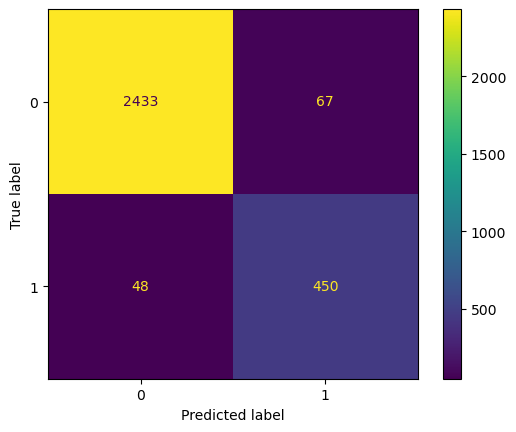

In [124]:
# Generate values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false postives then false negatives. Some employees may be identified as leaving when they don't. But overall, the model is still useful.

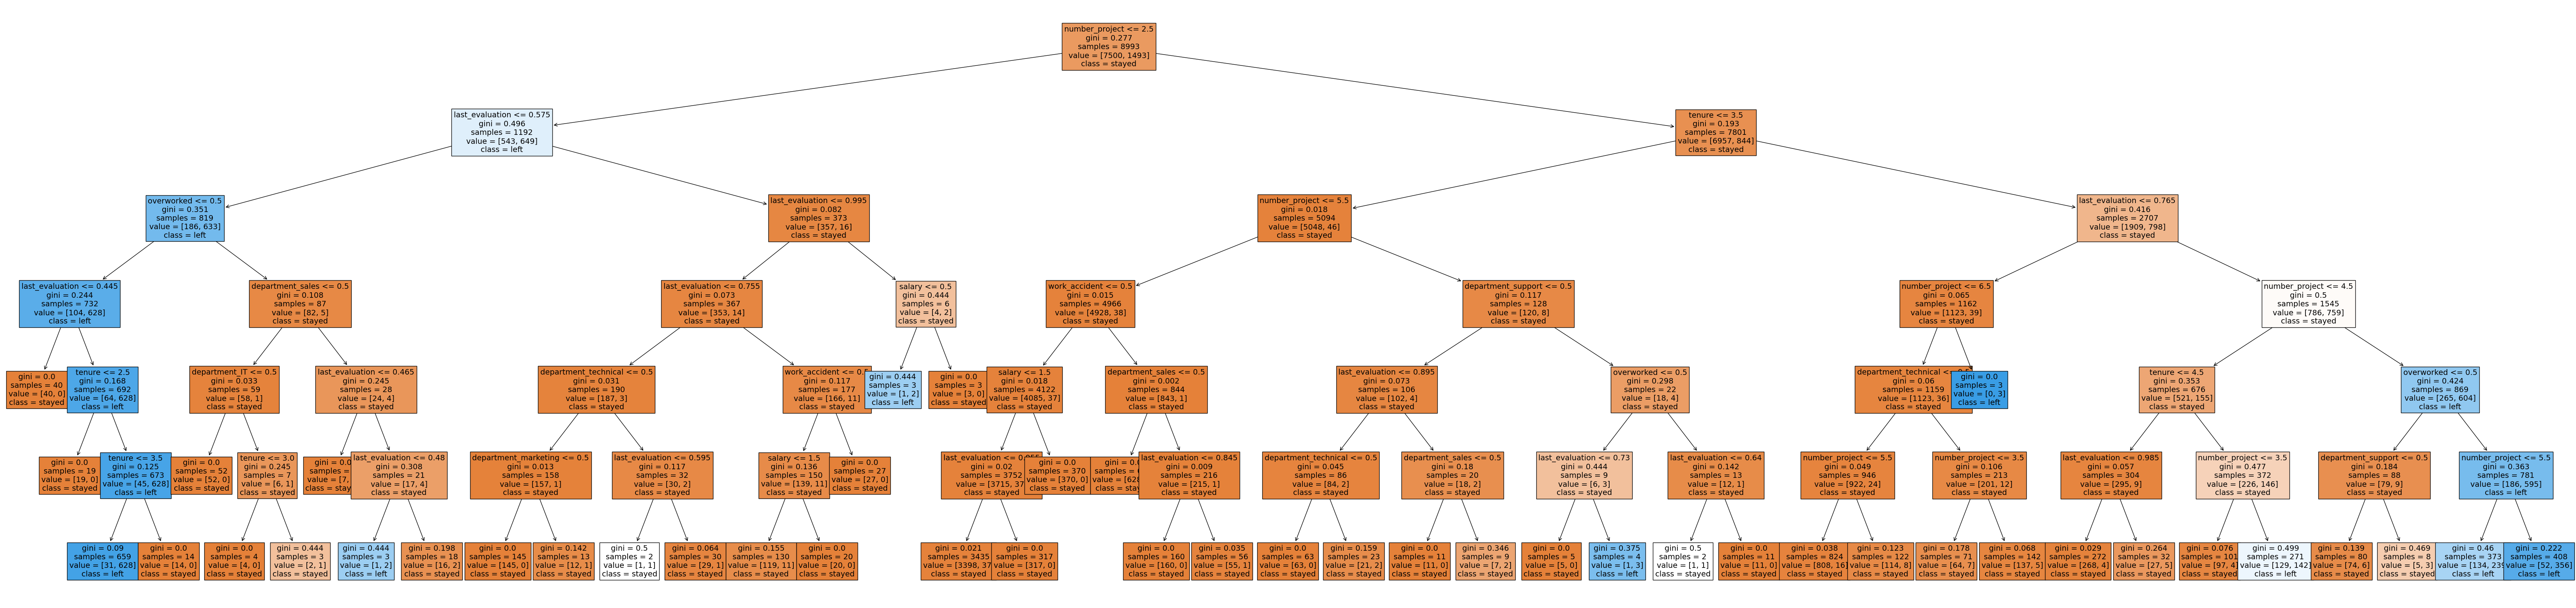

In [125]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [126]:
# Display the feature importance for the decision tree

tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

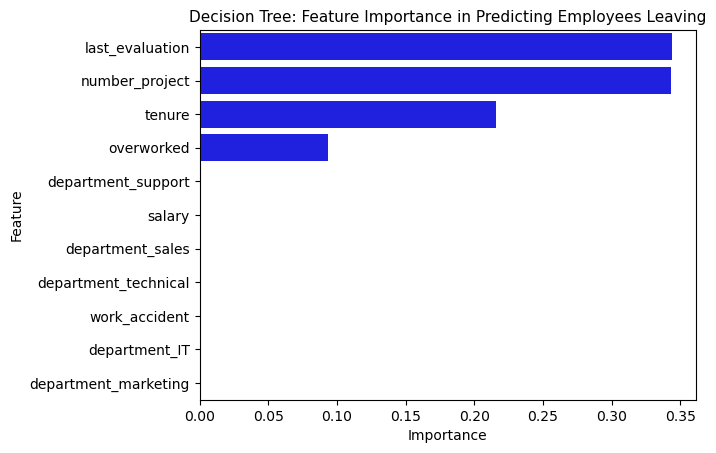

In [127]:
# Visualize feature importance

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h', color='Blue')
plt.title("Decision Tree: Feature Importance in Predicting Employees Leaving", fontsize=11)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

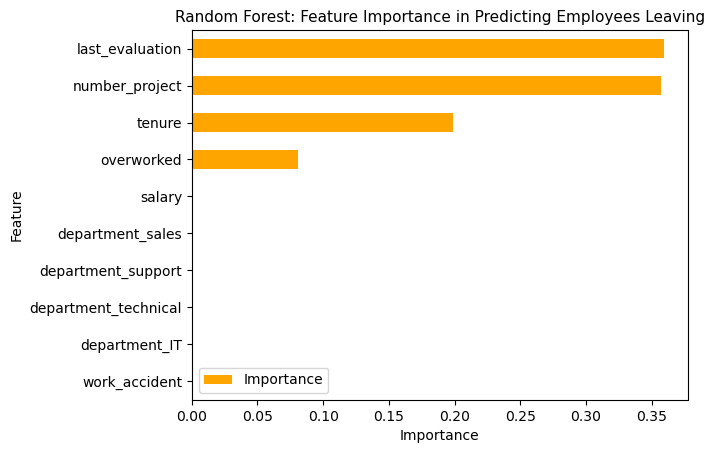

In [128]:
# Visualize random forest feature importance

# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance", color='orange')

ax1.set_title("Random Forest: Feature Importance in Predicting Employees Leaving", fontsize=11)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

End of exploration and analysis. Please see executive summary for final report.